In [372]:
#Testing connectivity with Untappd API
import requests #for requesting API calls
import pandas as pd #for building pandas dataframes for analysis
from pandas.io.json import json_normalize #help with converting dictionaries to dataframes
%matplotlib inline 
import datetime # for tracking API call counts
import seaborn as sns #for cool visulizations

In [373]:
# Assign URL to variable: url
url = 'https://api.untappd.com/v4' #base URL for all API calls
client_id = '?client_id=D9E63A3F203F8A4FDBE5B7E58CEDB2E90FF50AB4'
client_secret = '&client_secret=C861E23878359F93F1EF3FDB7F233095316C6CA5'
code='F1BD60BFBB99F5AA8D23067359210F6370EEE57E'
access_token = '51CDCC3DAECC020BA92A9D959963D27D5D1DA951'

In [363]:
#Parameters specific to user beer
user_beer = '/user/beers'
username = '/joshuaemayer' #return results for this user
limit = '&limit='
limit_num = 50
offset = '&offset='
offset_num = 0

In [364]:
#Let's keep track of how many API calls we are making for fun
api_count = []

In [223]:
# Package the request, send the request and catch the response: r
r = requests.get(url+user_beer+username+client_id+client_secret+limit+str(limit_num)+offset+str(offset_num))
api_count.append(format(datetime.datetime.now()))

In [224]:
api_count

['2017-04-13 22:01:46.996263', '2017-04-13 22:13:34.879621']

In [122]:
type(r)

requests.models.Response

In [123]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

In [124]:
type(json_data)

dict

In [135]:
json_data

{'meta': {'code': 200,
  'init_time': {'measure': 'seconds', 'time': 0.007},
  'response_time': {'measure': 'seconds', 'time': 0.033}},
 'notifications': [],
 'response': {'beers': {'count': 0,
   'items': [],
   'sort_english': 'Date (New to Old)',
   'sort_name': 'Date (New to Old)'},
  'brewery_id': False,
  'container_id': False,
  'country_id': False,
  'dates': {'end_date': False,
   'first_checkin_date': 'Fri, 01 Apr 2016 18:32:32 +0000',
   'start_date': False},
  'is_search': False,
  'sort': False,
  'sort_key': 'date',
  'sort_name': 'Date (New to Old)',
  'total_count': 202,
  'type_id': False}}

In [99]:
json_data['response']['beers']['items']

[{'beer': {'auth_rating': 3.75,
   'beer_abv': 6,
   'beer_description': '',
   'beer_ibu': 65,
   'beer_label': 'https://untappd.akamaized.net/site/beer_logos/beer-_26294_b5d54cb5876227cb9b364a126946.jpeg',
   'beer_name': 'Third Eye Pale Ale',
   'beer_slug': 'steamworks-brewing-co-third-eye-pale-ale',
   'beer_style': 'Pale Ale - American',
   'bid': 26294,
   'created_at': 'Sun, 23 Jan 2011 23:07:48 +0000',
   'rating_count': 2170,
   'rating_score': 3.606,
   'wish_list': False},
  'brewery': {'brewery_active': 1,
   'brewery_id': 4410,
   'brewery_label': 'https://untappd.akamaized.net/site/brewery_logos/brewery-SteamworksBrewingCo_4410.jpeg',
   'brewery_name': 'Steamworks Brewing Co. (Colorado)',
   'brewery_slug': 'steamworks-brewing-co-colorado',
   'contact': {'facebook': 'http://www.facebook.com/steamworksbrewing',
    'instagram': 'steamworksbrewing',
    'twitter': 'Stmworks',
    'url': 'http://steamworksbrewing.com/'},
   'country_name': 'United States',
   'location': 

In [232]:
df = json_normalize(json_data['response']['beers']['items'])

IndexError: list index out of range

In [102]:
df.groupby('beer.beer_style').size().sort_values(ascending=False)

beer.beer_style
IPA - American                        11
Pale Ale - American                    9
Stout - Russian Imperial               2
Brown Ale - American                   2
Stout - American Imperial / Double     2
Lager - North American Adjunct         2
Porter - American                      2
Witbier                                1
Belgian Dubbel                         1
Golden Ale                             1
IPA - Belgian                          1
IPA - English                          1
IPA - Imperial / Double                1
Lager - Vienna                         1
Märzen                                 1
Pilsner - German                       1
Pale Wheat Ale - American              1
Strong Ale - English                   1
Red Ale - American Amber / Red         1
Rye Beer                               1
Saison / Farmhouse Ale                 1
Schwarzbier                            1
Stout - American                       1
Stout - Imperial / Double              1


In [103]:
df[['beer.beer_name', 'beer.rating_score', 'rating_score']].head()

,beer.beer_name,beer.rating_score,rating_score
0,Third Eye Pale Ale,3.606,3.75
1,Drumroll APA,3.812,4.00
2,Java Bound,3.801,3.50
3,One Claw,3.792,3.75
4,White Thai,3.572,3.50


In [18]:
json_data['meta']['code']

200

In [60]:
json_data['response']['beers']['count']

50

In [134]:
json_data['response']['total_count']

202

In [365]:
#Initialize our zero vars
load_indicator = 0
api_call_counter = 0

#Since the Untappd API only allows 50 results per call, let's iterate until we acquire all of the results
#Hopefully we don't lose our API priveleges ;)
while (load_indicator == 0) & (len(api_count) <= 100) :
    # Package the request, send the request and catch the response: r
    r = requests.get(url+user_beer+username+client_id+client_secret+limit+str(limit_num)+offset+str(offset_num))
    # Let's keep track of how many API calls we are making, limit is 100 per hour
    api_count.append(format(datetime.datetime.now()))
    # Decode the JSON data into a dictionary: json_data
    json_data = r.json()
    if (json_data['meta']['code'] == 200) & (json_data['response']['beers']['count'] > 0) :
        df_name = json_normalize(json_data['response']['beers']['items'])
        print('Successfully Loaded & Normalized JSON Data')
        if api_call_counter == 0 :
            orig_df = df_name.copy()
            print('Succesfully Copied Original Dataframe')
        if api_call_counter > 0 :
            orig_df = orig_df.append(df_name, ignore_index=True)
            print('Successfully Appended to Original DataFrame ')
        api_call_counter += 1
        offset_num += limit_num
        print('Dataframes Loaded: ' + str(api_call_counter))
    elif (json_data['meta']['code'] == 200) & (json_data['response']['beers']['count'] == 0) :
        load_indicator = 1
        print('Finished Loading JSON Files')
        print('API Calls Made: ' + str(len(api_count)))
        print('Distinct Beers: ' + str(orig_df.shape[0]))
    elif (json_data['meta']['code'] != 200) :
            print('API call failed: ' + str('code: ') + str(json_data['meta']['code']) + ' '
                  + str(json_data['meta']['error_detail']))
    else :
        load_indicator = 1 
        print('Unknown reason for stopping')

Successfully Loaded & Normalized JSON Data
Succesfully Copied Original Dataframe
1 50
Successfully Loaded & Normalized JSON Data
Successfully Appended to Original DataFrame 
2 100
Successfully Loaded & Normalized JSON Data
Successfully Appended to Original DataFrame 
3 150
Successfully Loaded & Normalized JSON Data
Successfully Appended to Original DataFrame 
4 200
Successfully Loaded & Normalized JSON Data
Successfully Appended to Original DataFrame 
5 250
Finished Loading JSON Files
API Calls Made: 6


In [366]:
api_count

['2017-04-19 15:31:35.186232',
 '2017-04-19 15:31:37.062376',
 '2017-04-19 15:31:39.292899',
 '2017-04-19 15:31:40.505306',
 '2017-04-19 15:31:41.002158',
 '2017-04-19 15:31:42.783012']

In [371]:
#Yayyyyy!!!
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 35 columns):
beer.auth_rating                  210 non-null float64
beer.beer_abv                     210 non-null float64
beer.beer_description             210 non-null object
beer.beer_ibu                     210 non-null int64
beer.beer_label                   210 non-null object
beer.beer_name                    210 non-null object
beer.beer_slug                    210 non-null object
beer.beer_style                   210 non-null object
beer.bid                          210 non-null int64
beer.created_at                   210 non-null object
beer.rating_count                 210 non-null int64
beer.rating_score                 210 non-null float64
beer.wish_list                    210 non-null bool
brewery.brewery_active            210 non-null int64
brewery.brewery_id                210 non-null int64
brewery.brewery_label             210 non-null object
brewery.brewery_name              2

In [278]:
orig_df.groupby('beer.beer_style').size().sort_values(ascending=False).head(10)

beer.beer_style
Lager - Pale                      30
IPA - American                    23
Pale Ale - American               17
Lager - North American Adjunct     9
Red Ale - American Amber / Red     9
Märzen                             6
Lager - Dunkel Munich              5
Dunkelweizen                       5
Pale Ale - New Zealand             4
Saison / Farmhouse Ale             4
dtype: int64

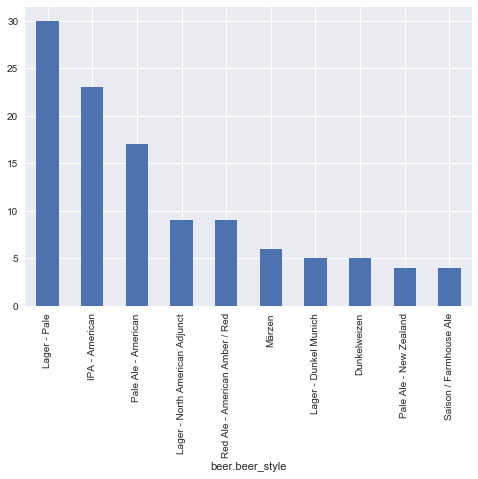

In [288]:
orig_df.groupby('beer.beer_style').size().sort_values(ascending=False).head(10).plot(kind='bar')

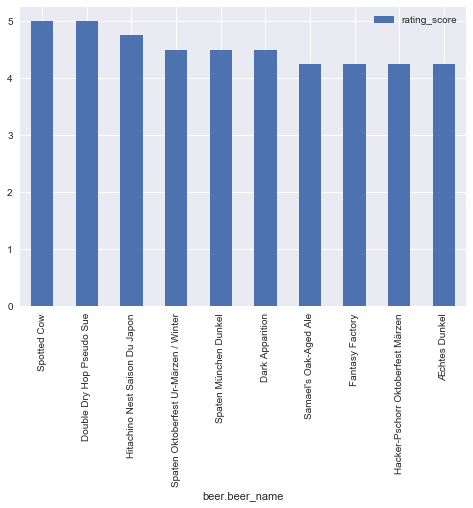

In [289]:
orig_df[['beer.beer_name', 'rating_score']].sort_values(by='rating_score', 
                                                        ascending=False).head(10).plot(x='beer.beer_name', kind='bar')

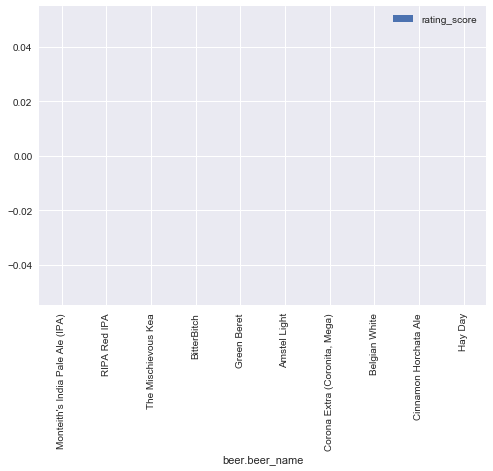

In [290]:
orig_df[['beer.beer_name', 'rating_score']].sort_values(by='rating_score', 
                                                        ascending=True).head(10).plot(x='beer.beer_name', kind='bar')

In [291]:
orig_df[orig_df['rating_score'] == 0.0].count()['beer.beer_name']

36

In [292]:
orig_df['rating_score'].describe()

count    205.000000
mean       2.776829
std        1.417637
min        0.000000
25%        2.500000
50%        3.250000
75%        3.750000
max        5.000000
Name: rating_score, dtype: float64

In [293]:
orig_df[orig_df['rating_score'] != 0.0]['rating_score'].describe()

count    169.000000
mean       3.368343
std        0.660349
min        1.500000
25%        2.750000
50%        3.500000
75%        3.750000
max        5.000000
Name: rating_score, dtype: float64

In [307]:
#sns.barplot(x='beer.beer_name', y='rating_score', hue='beer.beer_style', data=orig_df)

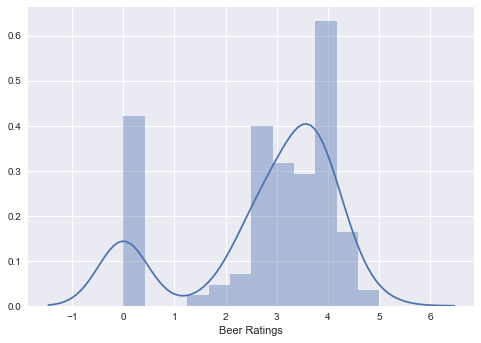

In [323]:
sns.distplot(orig_df['rating_score'], axlabel='Beer Ratings')

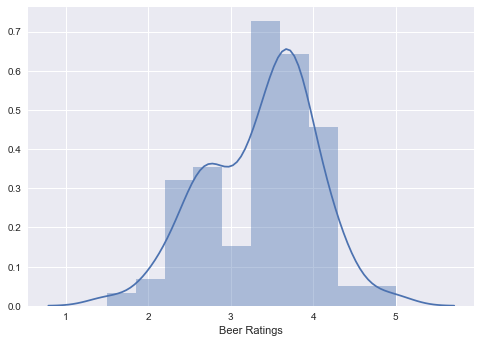

In [324]:
my_ratings = orig_df[orig_df['rating_score'] != 0.0]['rating_score']
sns.distplot(my_ratings, axlabel='Beer Ratings')

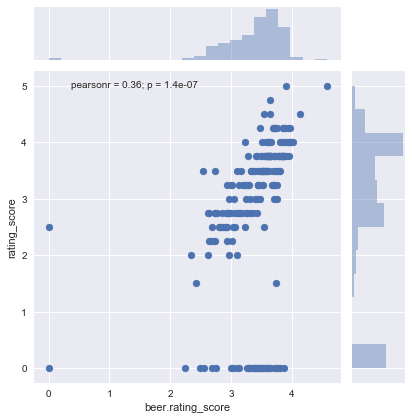

In [326]:
sns.jointplot(x="beer.rating_score", y="rating_score", data=orig_df)

In [333]:
orig_df[(orig_df['rating_score'] != 0.0) & (orig_df['beer.rating_score'] != 0.0)]['beer.rating_score'].describe()

count    168.000000
mean       3.419702
std        0.402467
min        2.344000
25%        3.121250
50%        3.515000
75%        3.717750
max        4.568000
Name: beer.rating_score, dtype: float64

In [334]:
orig_df[(orig_df['rating_score'] != 0.0) & (orig_df['beer.rating_score'] != 0.0)]['rating_score'].describe()

count    168.000000
mean       3.373512
std        0.658885
min        1.500000
25%        2.750000
50%        3.500000
75%        3.750000
max        5.000000
Name: rating_score, dtype: float64

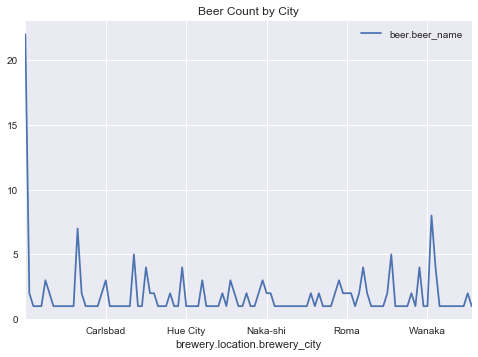

In [360]:
orig_df.groupby('brewery.location.brewery_city')['beer.beer_name'].count().plot(title='Beer Count by City', legend=True)

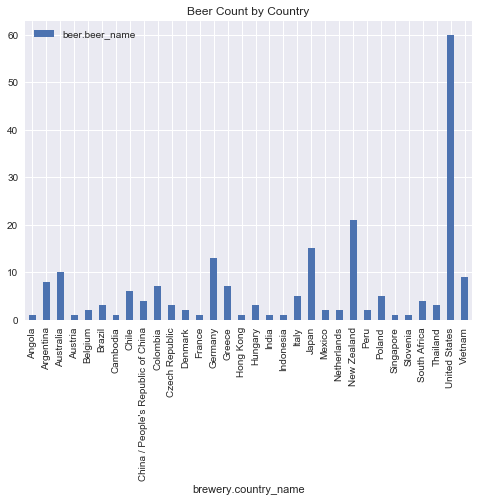

In [358]:
orig_df.groupby('brewery.country_name')['beer.beer_name'].count().plot(kind='bar', title='Beer Count by Country', legend=True)

In [356]:
orig_df.to_excel('beer-data.xlsx', sheet_name='Sheet1')